Optimal Price: 45.40
Max Expected Revenue: 25.28


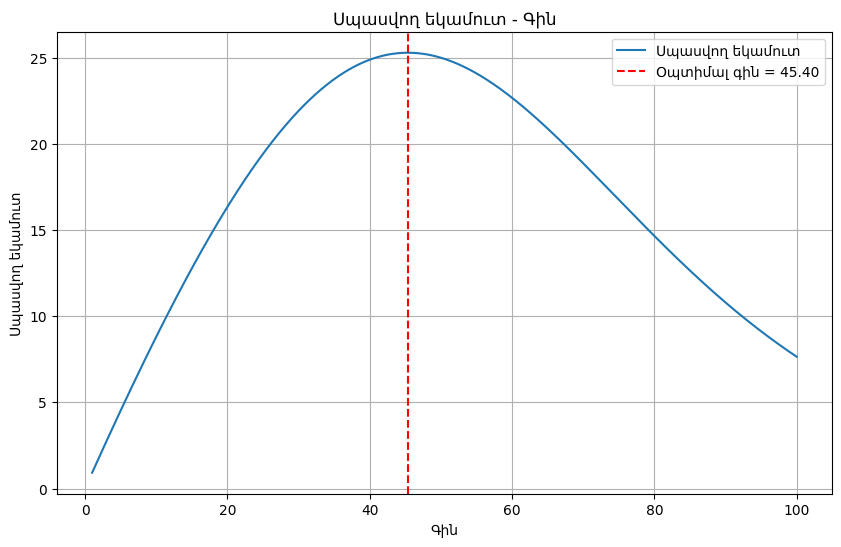

In [ ]:
# ------------------------------------------------------------------------------- Logistic --------------------------------------------------------------------------------------

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Step 1: Generate random buyer valuations
num_buyers = 10000  # Increased for better estimation
buyer_valuations = np.random.uniform(0, 100, num_buyers)

# Step 2: Assign prices to buyers
price_points = np.arange(1, 101)  # Prices from 1 to 100
buyers_per_price = num_buyers // len(price_points)
num_buyers = buyers_per_price * len(price_points)
buyer_valuations = np.random.uniform(0, 100, num_buyers)
prices = np.repeat(price_points, buyers_per_price)

# Step 3: Record purchase decisions
purchases = buyer_valuations >= prices
purchase_decisions = purchases.astype(int)

# Step 4: Create logistic regression model
data = pd.DataFrame({
    'Price': prices,
    'Purchase': purchase_decisions
})
data['Intercept'] = 1
X = data[['Intercept', 'Price']]
y = data['Purchase']
logit_model = sm.Logit(y, X)
result = logit_model.fit(disp=False)

# Step 5: Estimate probability of purchase
prediction_prices = np.linspace(1, 100, 1000)
prediction_data = pd.DataFrame({
    'Intercept': 1,
    'Price': prediction_prices
})
purchase_probabilities = result.predict(prediction_data)
purchase_probabilities = np.clip(purchase_probabilities, 0, 1)

# Step 6: Evaluate optimal price
expected_revenue = prediction_prices * purchase_probabilities
max_revenue_index = np.argmax(expected_revenue)
optimal_price = prediction_prices[max_revenue_index]
max_revenue = expected_revenue[max_revenue_index]

print(f'Optimal Price: {optimal_price:.2f}')
print(f'Max Expected Revenue: {max_revenue:.2f}')

# Optional: Plot the results
plt.figure(figsize=(10,6))
plt.plot(prediction_prices, expected_revenue, label='Սպասվող եկամուտ')
plt.axvline(x=optimal_price, color='red', linestyle='--', label=f'Օպտիմալ գին = {optimal_price:.2f}')
plt.xlabel('Գին')
plt.ylabel('Սպասվող եկամուտ')
plt.title('Սպասվող եկամուտ - Գին')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# -----------------------------------------------------------------------------------Epsilion-Greed Algorithm-----------------------------------------------------------------------------

import numpy as np

# Parameters
num_buyers = 100000  # Total number of buyers
buyers_per_round = 10  # Number of buyers tested per round
price_points = np.arange(0,101,1)  # Available prices
epsilon = 0.2  # Exploration probability
num_rounds = num_buyers // buyers_per_round  # Max rounds before all buyers are consumed

# Generate buyer valuations
buyer_valuations = np.random.uniform(0, 100, num_buyers)

# Initialize rewards and counts
rewards = np.zeros(len(price_points))  # Average reward for each price
counts = np.zeros(len(price_points))  # Number of times each price was selected

# Simulate rounds
for round_num in range(1, num_rounds + 1):
    # Select buyers for this round
    buyers_this_round = buyer_valuations[:buyers_per_round]
    buyer_valuations = buyer_valuations[buyers_per_round:]  # Remove these buyers from the pool

    # Decide whether to explore or exploit
    if np.random.rand() < epsilon:  # Explore
        action = "Explore"
        chosen_price_index = np.random.choice(len(price_points))
    else:  # Exploit
        action = "Exploit"
        chosen_price_index = np.argmax(rewards)

    chosen_price = price_points[chosen_price_index]

    # Calculate reward (revenue)
    purchases = buyers_this_round >= chosen_price  # Buyers who purchase
    quantity_sold = np.sum(purchases)
    reward = chosen_price * quantity_sold

    # Update rewards and counts
    counts[chosen_price_index] += 1
    rewards[chosen_price_index] += (reward - rewards[chosen_price_index]) / counts[chosen_price_index]

    # Print round summary
    print(f"Round {round_num}: {action} | Chosen Price: ${chosen_price} | Reward: ${reward:.2f} | Remaining Buyers: {len(buyer_valuations)}")

# Final results
print("\nFinal Average Rewards:", rewards)
print("Number of Times Each Price was Chosen:", counts)


Streaming output truncated to the last 5000 lines.
Round 5032: Exploit | Chosen Price: $50 | Reward: $350.00 | Remaining Buyers: 49680
Round 5033: Exploit | Chosen Price: $50 | Reward: $200.00 | Remaining Buyers: 49670
Round 5034: Exploit | Chosen Price: $50 | Reward: $250.00 | Remaining Buyers: 49660
Round 5035: Exploit | Chosen Price: $50 | Reward: $150.00 | Remaining Buyers: 49650
Round 5036: Exploit | Chosen Price: $50 | Reward: $200.00 | Remaining Buyers: 49640
Round 5037: Exploit | Chosen Price: $50 | Reward: $300.00 | Remaining Buyers: 49630
Round 5038: Exploit | Chosen Price: $50 | Reward: $150.00 | Remaining Buyers: 49620
Round 5039: Exploit | Chosen Price: $50 | Reward: $200.00 | Remaining Buyers: 49610
Round 5040: Exploit | Chosen Price: $50 | Reward: $350.00 | Remaining Buyers: 49600
Round 5041: Exploit | Chosen Price: $50 | Reward: $300.00 | Remaining Buyers: 49590
Round 5042: Exploit | Chosen Price: $50 | Reward: $200.00 | Remaining Buyers: 49580
Round 5043: Explore | Cho

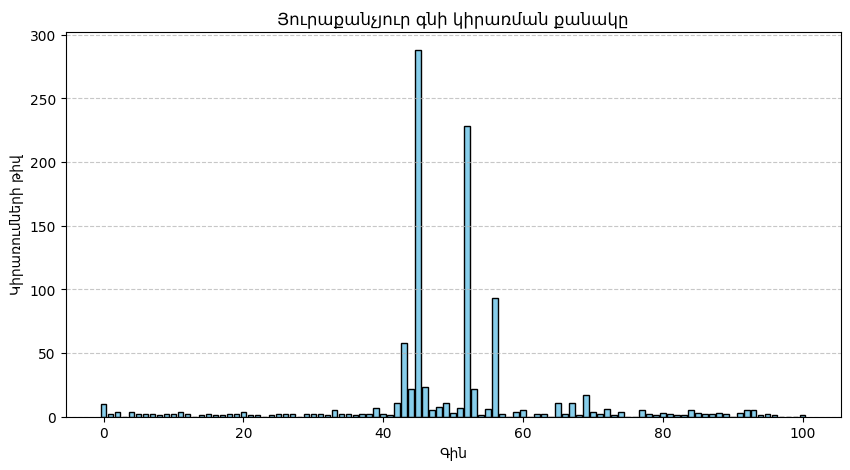

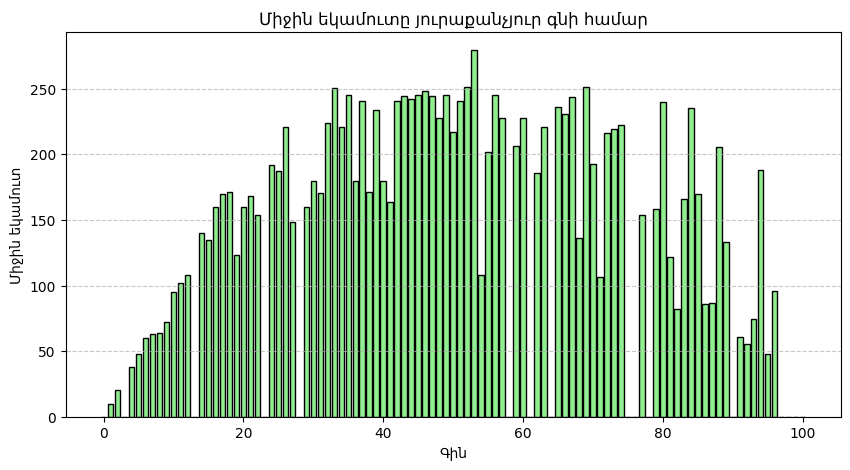

In [ ]:
# -----------------------------------------------------------------------------------Epsilion-Greed Algorithm-----------------------------------------------------------------------------

import matplotlib.pyplot as plt

# Parameters
num_buyers = 10000  # Total number of buyers
buyers_per_round = 10  # Number of buyers tested per round
price_points = np.arange(0, 101, 1)  # Available prices
epsilon = 0.2  # Exploration probability
num_rounds = num_buyers // buyers_per_round  # Max rounds before all buyers are consumed

# Generate buyer valuations
buyer_valuations = np.random.uniform(0, 100, num_buyers)

# Initialize rewards and counts
rewards = np.zeros(len(price_points))  # Average reward for each price
counts = np.zeros(len(price_points))  # Number of times each price was selected

# Simulate rounds
for round_num in range(1, num_rounds + 1):
    # Select buyers for this round
    buyers_this_round = buyer_valuations[:buyers_per_round]
    buyer_valuations = buyer_valuations[buyers_per_round:]  # Remove these buyers from the pool

    # Decide whether to explore or exploit
    if np.random.rand() < epsilon:  # Explore
        action = "Explore"
        chosen_price_index = np.random.choice(len(price_points))
    else:  # Exploit
        action = "Exploit"
        chosen_price_index = np.argmax(rewards)

    chosen_price = price_points[chosen_price_index]

    # Calculate reward (revenue)
    purchases = buyers_this_round >= chosen_price  # Buyers who purchase
    quantity_sold = np.sum(purchases)
    reward = chosen_price * quantity_sold

    # Update rewards and counts
    counts[chosen_price_index] += 1
    rewards[chosen_price_index] += (reward - rewards[chosen_price_index]) / counts[chosen_price_index]

# Chart 1: Number of Times Each Price Was Chosen
plt.figure(figsize=(10, 5))
plt.bar(price_points, counts, color='skyblue', edgecolor='black')
plt.title("Յուրաքանչյուր գնի կիրառման քանակը")
plt.xlabel("Գին")
plt.ylabel("Կիրառումների թիվ")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Chart 2: Average Rewards for Each Price
plt.figure(figsize=(10, 5))
plt.bar(price_points, rewards, color='lightgreen', edgecolor='black')
plt.title("Միջին եկամուտը յուրաքանչյուր գնի համար")
plt.xlabel("Գին")
plt.ylabel("Միջին եկամուտ")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Round 1: Chosen Price: $0 | Reward: $0.00 | Remaining Buyers: 9990
Round 2: Chosen Price: $1 | Reward: $10.00 | Remaining Buyers: 9980
Round 3: Chosen Price: $2 | Reward: $20.00 | Remaining Buyers: 9970
Round 4: Chosen Price: $3 | Reward: $30.00 | Remaining Buyers: 9960
Round 5: Chosen Price: $4 | Reward: $40.00 | Remaining Buyers: 9950
Round 6: Chosen Price: $5 | Reward: $45.00 | Remaining Buyers: 9940
Round 7: Chosen Price: $6 | Reward: $60.00 | Remaining Buyers: 9930
Round 8: Chosen Price: $7 | Reward: $49.00 | Remaining Buyers: 9920
Round 9: Chosen Price: $8 | Reward: $56.00 | Remaining Buyers: 9910
Round 10: Chosen Price: $9 | Reward: $81.00 | Remaining Buyers: 9900
Round 11: Chosen Price: $10 | Reward: $90.00 | Remaining Buyers: 9890
Round 12: Chosen Price: $11 | Reward: $77.00 | Remaining Buyers: 9880
Round 13: Chosen Price: $12 | Reward: $108.00 | Remaining Buyers: 9870
Round 14: Chosen Price: $13 | Reward: $104.00 | Remaining Buyers: 9860
Round 15: Chosen Price: $14 | Reward: 

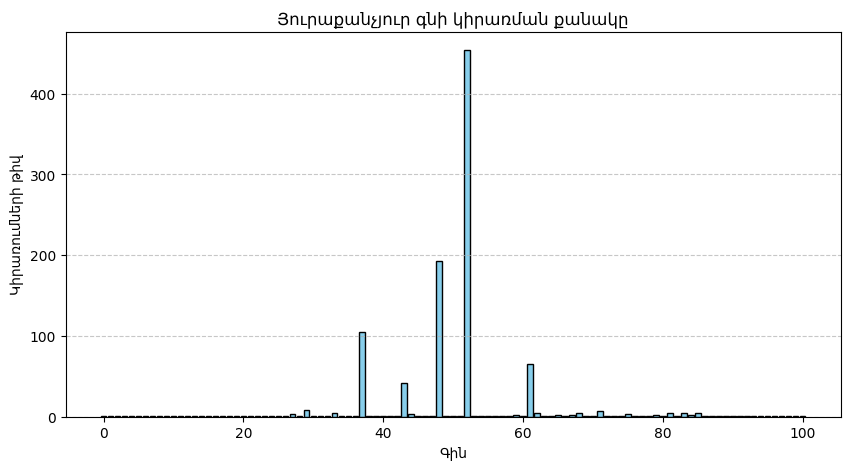

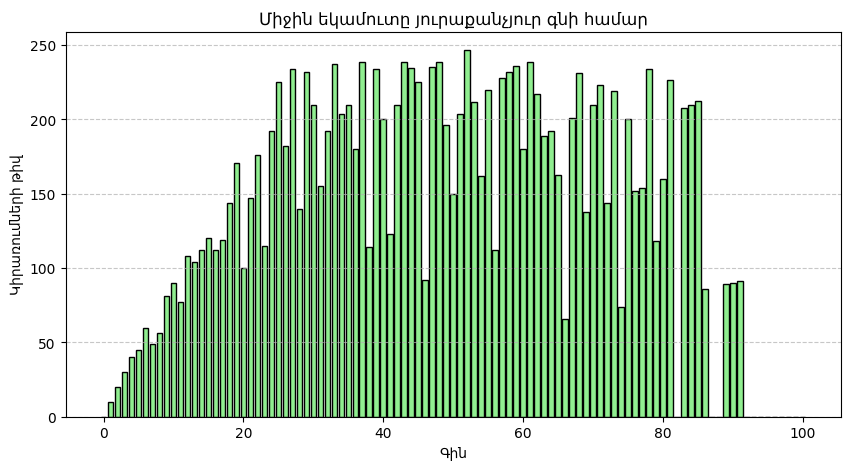

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_buyers = 10000  # Total number of buyers
buyers_per_round = 10  # Number of buyers tested per round
price_points = np.arange(0, 101, 1)  # Available prices
num_rounds = num_buyers // buyers_per_round  # Max rounds before all buyers are consumed

# Generate buyer valuations
buyer_valuations = np.random.uniform(0, 100, num_buyers)

# Initialize rewards and counts
rewards = np.zeros(len(price_points))  # Average reward for each price
counts = np.zeros(len(price_points))  # Number of times each price was selected
total_rounds = 0  # Total rounds played for UCB calculations

# Simulate rounds
for round_num in range(1, num_rounds + 1):
    # Select buyers for this round
    buyers_this_round = buyer_valuations[:buyers_per_round]
    buyer_valuations = buyer_valuations[buyers_per_round:]  # Remove these buyers from the pool

    # Calculate UCB scores
    ucb_scores = np.zeros(len(price_points))
    for i in range(len(price_points)):
        if counts[i] > 0:
            # UCB calculation for tried prices
            ucb_scores[i] = rewards[i] + np.sqrt(2 * np.log(total_rounds + 1) / counts[i])
        else:
            # Assign a very high value for untried prices to ensure exploration
            ucb_scores[i] = float('inf')

    # Select price with the highest UCB score
    chosen_price_index = np.argmax(ucb_scores)
    chosen_price = price_points[chosen_price_index]

    # Calculate reward (revenue)
    purchases = buyers_this_round >= chosen_price  # Buyers who purchase
    quantity_sold = np.sum(purchases)
    reward = chosen_price * quantity_sold

    # Update rewards and counts
    counts[chosen_price_index] += 1
    rewards[chosen_price_index] += (reward - rewards[chosen_price_index]) / counts[chosen_price_index]

    # Increment total rounds played
    total_rounds += 1

    # Print round summary
    print(f"Round {round_num}: Chosen Price: ${chosen_price} | Reward: ${reward:.2f} | Remaining Buyers: {len(buyer_valuations)}")

# Chart 1: Number of Times Each Price Was Chosen
plt.figure(figsize=(10, 5))
plt.bar(price_points, counts, color='skyblue', edgecolor='black')
plt.title("Յուրաքանչյուր գնի կիրառման քանակը")
plt.xlabel("Գին")
plt.ylabel("Կիրառումների թիվ")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Chart 2: Average Rewards for Each Price
plt.figure(figsize=(10, 5))
plt.bar(price_points, rewards, color='lightgreen', edgecolor='black')
plt.title("Միջին եկամուտը յուրաքանչյուր գնի համար")
plt.xlabel("Գին")
plt.ylabel("Կիրառումների թիվ")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Optimal Price: $51.00
Maximum Expected Revenue: $26.62


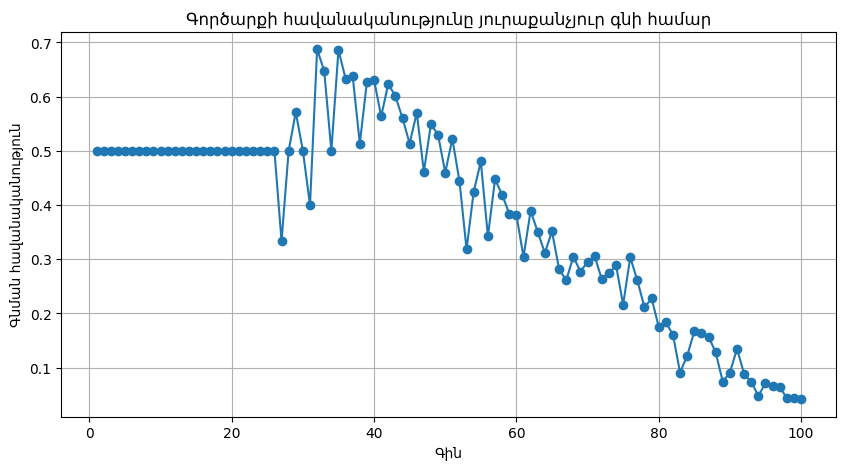

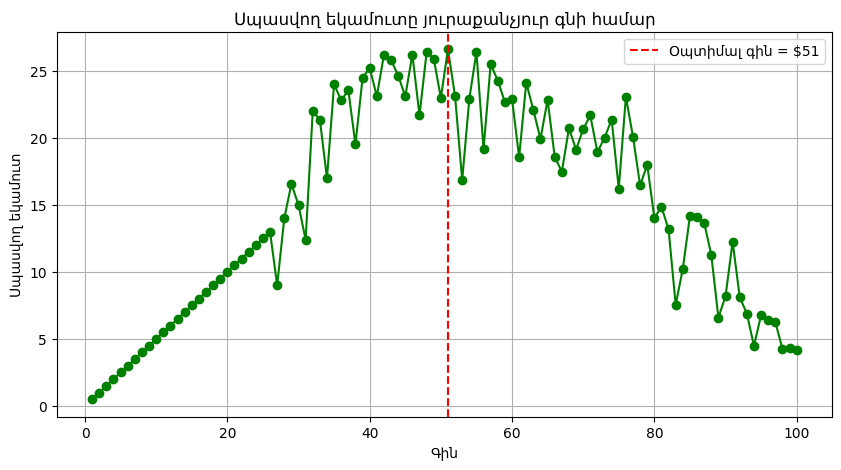

In [ ]:
# ------------------------------------------------------------------------------------------Bayesian Updating and Inference------------------------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_buyers = 10000  # Total number of buyers
price_points = np.arange(1, 101, 1)  # Available prices from $1 to $100

# Generate buyer valuations
buyer_valuations = np.random.uniform(0, 100, num_buyers)

# Initialize priors (Beta distributions) for each price
alpha = np.ones(len(price_points))  # Successes (starts with 1 to avoid zero probabilities)
beta = np.ones(len(price_points))  # Failures (starts with 1 to avoid zero probabilities)

# Simulate customer-by-customer process
for buyer in buyer_valuations:
    # Sample from posterior distributions for each price
    sampled_probabilities = np.random.beta(alpha, beta)

    # Calculate expected revenue for each price
    expected_revenues = price_points * sampled_probabilities

    # Select the price with the highest expected revenue
    chosen_price_index = np.argmax(expected_revenues)
    chosen_price = price_points[chosen_price_index]

    # Observe customer decision (purchase if valuation >= chosen price)
    if buyer >= chosen_price:
        alpha[chosen_price_index] += 1  # Increment successes
    else:
        beta[chosen_price_index] += 1  # Increment failures

# Final Posterior Probabilities
posterior_means = alpha / (alpha + beta)

# Optimal Price
expected_revenues = price_points * posterior_means
optimal_price_index = np.argmax(expected_revenues)
optimal_price = price_points[optimal_price_index]
optimal_revenue = expected_revenues[optimal_price_index]

print(f"Optimal Price: ${optimal_price:.2f}")
print(f"Maximum Expected Revenue: ${optimal_revenue:.2f}")

# Visualization
# Posterior Mean Probabilities
plt.figure(figsize=(10, 5))
plt.plot(price_points, posterior_means, marker='o', linestyle='-')
plt.title("Գործարքի հավանականությունը յուրաքանչյուր գնի համար")
plt.xlabel("Գին")
plt.ylabel("Գնման հավանականություն")
plt.grid(True)
plt.show()

# Expected Revenue
plt.figure(figsize=(10, 5))
plt.plot(price_points, expected_revenues, marker='o', linestyle='-', color='green')
plt.axvline(x=optimal_price, color='red', linestyle='--', label=f'Օպտիմալ գին = ${optimal_price}')
plt.title("Սպասվող եկամուտը յուրաքանչյուր գնի համար")
plt.xlabel("Գին")
plt.ylabel("Սպասվող եկամուտ")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np

# Function to simulate Bayesian Updating and Inference
def simulate_bayesian_updating(num_buyers=10000, price_points=np.arange(1, 101, 1)):
    # Generate buyer valuations
    buyer_valuations = np.random.uniform(0, 100, num_buyers)

    # Initialize priors (Beta distributions) for each price
    alpha = np.ones(len(price_points))  # Successes (starts with 1 to avoid zero probabilities)
    beta = np.ones(len(price_points))  # Failures (starts with 1 to avoid zero probabilities)

    # Simulate customer-by-customer process
    for buyer in buyer_valuations:
        # Sample from posterior distributions for each price
        sampled_probabilities = np.random.beta(alpha, beta)

        # Calculate expected revenue for each price
        expected_revenues = price_points * sampled_probabilities

        # Select the price with the highest expected revenue
        chosen_price_index = np.argmax(expected_revenues)
        chosen_price = price_points[chosen_price_index]

        # Observe customer decision (purchase if valuation >= chosen price)
        if buyer >= chosen_price:
            alpha[chosen_price_index] += 1  # Increment successes
        else:
            beta[chosen_price_index] += 1  # Increment failures

    # Final Posterior Probabilities
    posterior_means = alpha / (alpha + beta)

    # Optimal Price
    expected_revenues = price_points * posterior_means
    optimal_price_index = np.argmax(expected_revenues)
    optimal_price = price_points[optimal_price_index]

    return optimal_price

# Simulation Parameters
num_simulations = 100

# Simulate Bayesian Updating 100 times
optimal_prices_bayesian_simulation = [simulate_bayesian_updating() for _ in range(num_simulations)]

# Calculate statistics
average_optimal_price_bayesian_simulation = np.mean(optimal_prices_bayesian_simulation)
std_optimal_price_bayesian_simulation = np.std(optimal_prices_bayesian_simulation)

# Print results
print(f"Average Optimal Price: {average_optimal_price_bayesian_simulation:.2f}")
print(f"Standard Deviation of Optimal Price: {std_optimal_price_bayesian_simulation:.2f}")


Average Optimal Price: 50.27
Standard Deviation of Optimal Price: 4.64
